In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
data=pd.read_csv('application_data.csv')

In [3]:
data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [4]:
data.shape

(307511, 122)

In [5]:
pd.set_option('display.max_columns', None)
data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [6]:
pd.set_option('display.max_rows', None)
print(data.isnull().sum().sort_values(ascending=False))

COMMONAREA_AVG                  214865
COMMONAREA_MODE                 214865
COMMONAREA_MEDI                 214865
NONLIVINGAPARTMENTS_MEDI        213514
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_AVG         213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_AVG            210199
LIVINGAPARTMENTS_MEDI           210199
LIVINGAPARTMENTS_MODE           210199
FLOORSMIN_MODE                  208642
FLOORSMIN_AVG                   208642
FLOORSMIN_MEDI                  208642
YEARS_BUILD_AVG                 204488
YEARS_BUILD_MODE                204488
YEARS_BUILD_MEDI                204488
OWN_CAR_AGE                     202929
LANDAREA_MEDI                   182590
LANDAREA_AVG                    182590
LANDAREA_MODE                   182590
BASEMENTAREA_MODE               179943
BASEMENTAREA_MEDI               179943
BASEMENTAREA_AVG                179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_MODE              169682
NONLIVINGAREA_AVG        

In [7]:
threshold = 0.4 * len(data)
missing_cols = data.columns[data.isnull().sum() > threshold]
missing_cols= missing_cols.tolist()
print(missing_cols)

['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE

In [8]:
len(missing_cols)

49

Therea aree a total of 49 columns where the 40% of the rows data is missing. we can oberse that most of the data missing is realted to the house of the customer.

In [9]:
print(data['FLAG_OWN_CAR'].value_counts())
print(data['FLAG_OWN_CAR'].isnull().sum())
print(data['OWN_CAR_AGE'].isnull().sum())

FLAG_OWN_CAR
N    202924
Y    104587
Name: count, dtype: int64
0
202929


In [10]:
## here we can oberseve that the missing values in teh age of the the car is equal to the number of people not having a car so  we can use this variable which is useful

In [11]:
data['OWN_CAR_AGE'] = data['OWN_CAR_AGE'].fillna(-1)

In [12]:
missing_cols.remove('OWN_CAR_AGE')

In [13]:
data.drop(columns=missing_cols, inplace=True)

In [14]:
data.shape

(307511, 74)

In [15]:
# Get columns with missing values and filter only those with more than 0 NaNs
missing_values = data.isnull().sum().sort_values(ascending=False)
missing_values = missing_values[missing_values > 0]

# Print the result
print(missing_values)

OCCUPATION_TYPE               96391
EXT_SOURCE_3                  60965
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_HOUR    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
NAME_TYPE_SUITE                1292
OBS_30_CNT_SOCIAL_CIRCLE       1021
DEF_30_CNT_SOCIAL_CIRCLE       1021
DEF_60_CNT_SOCIAL_CIRCLE       1021
OBS_60_CNT_SOCIAL_CIRCLE       1021
EXT_SOURCE_2                    660
AMT_GOODS_PRICE                 278
AMT_ANNUITY                      12
CNT_FAM_MEMBERS                   2
DAYS_LAST_PHONE_CHANGE            1
dtype: int64


In [16]:
cols_to_check = [
    'NAME_TYPE_SUITE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
    'DEF_60_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2',
    'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE'
]
data.dropna(subset=cols_to_check, inplace=True)

In [17]:
columns_to_drop = [
    'AMT_REQ_CREDIT_BUREAU_QRT',
    'AMT_REQ_CREDIT_BUREAU_YEAR',
    'AMT_REQ_CREDIT_BUREAU_DAY',
    'AMT_REQ_CREDIT_BUREAU_HOUR',
    'AMT_REQ_CREDIT_BUREAU_MON',
    'AMT_REQ_CREDIT_BUREAU_WEEK'
]

data.drop(columns=columns_to_drop, inplace=True)


In [18]:
data['OCCUPATION_TYPE']=data['OCCUPATION_TYPE'].fillna('Unknown')

In [19]:
corr_with_ext3 = data.corr(numeric_only=True)['EXT_SOURCE_3'].drop(['EXT_SOURCE_3','TARGET'])
top_10_features = corr_with_ext3.abs().sort_values(ascending=False).head(10).index.tolist()
top_10_features

['DAYS_BIRTH',
 'DAYS_ID_PUBLISH',
 'FLAG_EMP_PHONE',
 'DAYS_EMPLOYED',
 'EXT_SOURCE_2',
 'DAYS_REGISTRATION',
 'REG_CITY_NOT_WORK_CITY',
 'REG_CITY_NOT_LIVE_CITY',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_6']

In [20]:
features_for_knn = top_10_features + ['EXT_SOURCE_3']
knn_data = data[features_for_knn]
imputer = KNNImputer(n_neighbors=5)
imputed_array = imputer.fit_transform(knn_data)
imputed_df = pd.DataFrame(imputed_array, columns=features_for_knn)
data['EXT_SOURCE_3'] = imputed_df['EXT_SOURCE_3']

In [21]:
data.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
OWN_CAR_AGE                    float64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE         

In [22]:
categorical_columns=data.select_dtypes(include=['object','category']).columns
print(categorical_columns)

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object')


In [23]:
for col in categorical_columns:
    print(data.groupby(col)['Target'.upper()].sum())
    print('\n')

NAME_CONTRACT_TYPE
Cash loans         23123
Revolving loans     1544
Name: TARGET, dtype: int64


CODE_GENDER
F      14063
M      10604
XNA        0
Name: TARGET, dtype: int64


FLAG_OWN_CAR
N    17132
Y     7535
Name: TARGET, dtype: int64


FLAG_OWN_REALTY
N     7782
Y    16885
Name: TARGET, dtype: int64


NAME_TYPE_SUITE
Children             240
Family              3002
Group of people       23
Other_A               76
Other_B              173
Spouse, partner      893
Unaccompanied      20260
Name: TARGET, dtype: int64


NAME_INCOME_TYPE
Businessman                 0
Commercial associate     5322
Maternity leave             2
Pensioner                2959
State servant            1239
Student                     0
Unemployed                  8
Working                 15137
Name: TARGET, dtype: int64


NAME_EDUCATION_TYPE
Academic degree                      3
Higher education                  3973
Incomplete higher                  865
Lower secondary                    413
Secondary

In the about mentioned data the is not data that can be said as ordical kind of data so ther is no specific ranking that can be given to the data in the above format. for the yes and no type of the data we can give a 0 1 mapping to the data.

C:\Users\marut\AppData\Local\Temp\ipykernel_24376\3387204185.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col,palette="Set2")


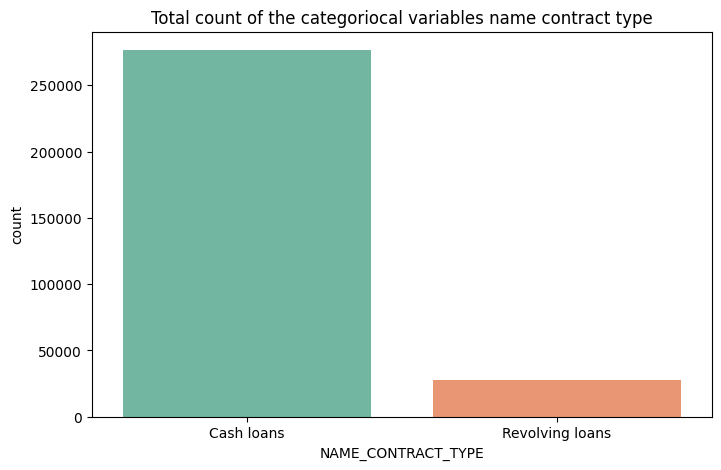

C:\Users\marut\AppData\Local\Temp\ipykernel_24376\3387204185.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col,palette="Set2")


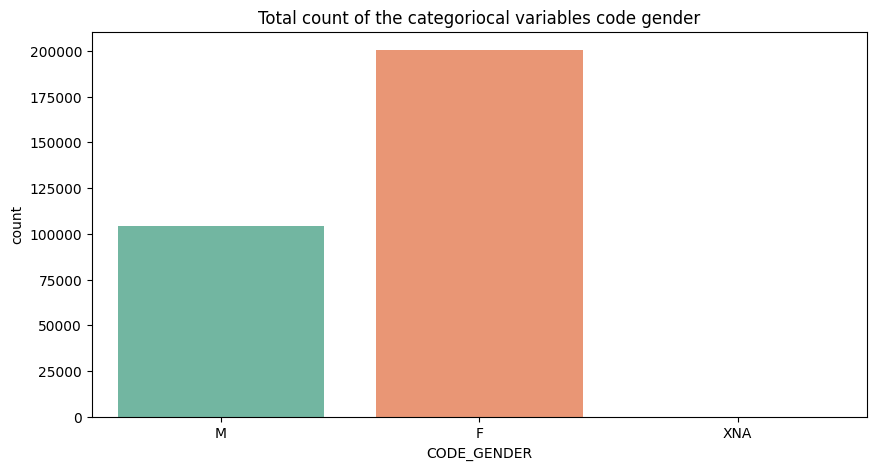

C:\Users\marut\AppData\Local\Temp\ipykernel_24376\3387204185.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col,palette="Set2")


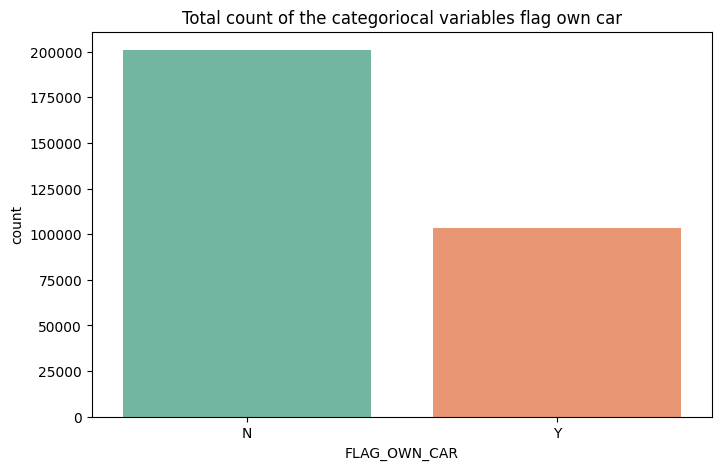

C:\Users\marut\AppData\Local\Temp\ipykernel_24376\3387204185.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col,palette="Set2")


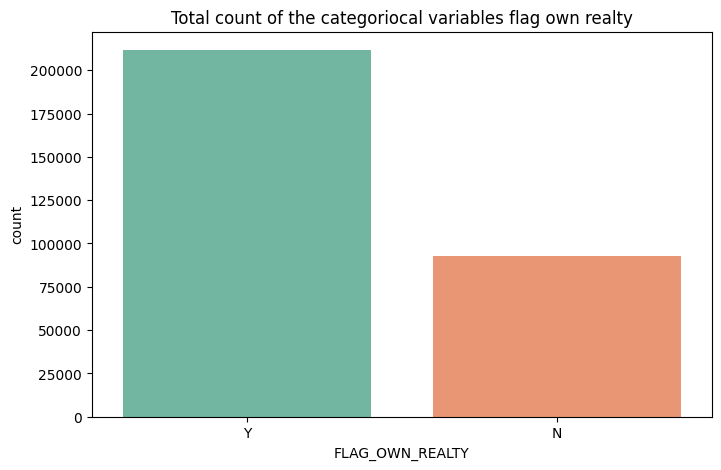

C:\Users\marut\AppData\Local\Temp\ipykernel_24376\3387204185.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col,palette="Set2")


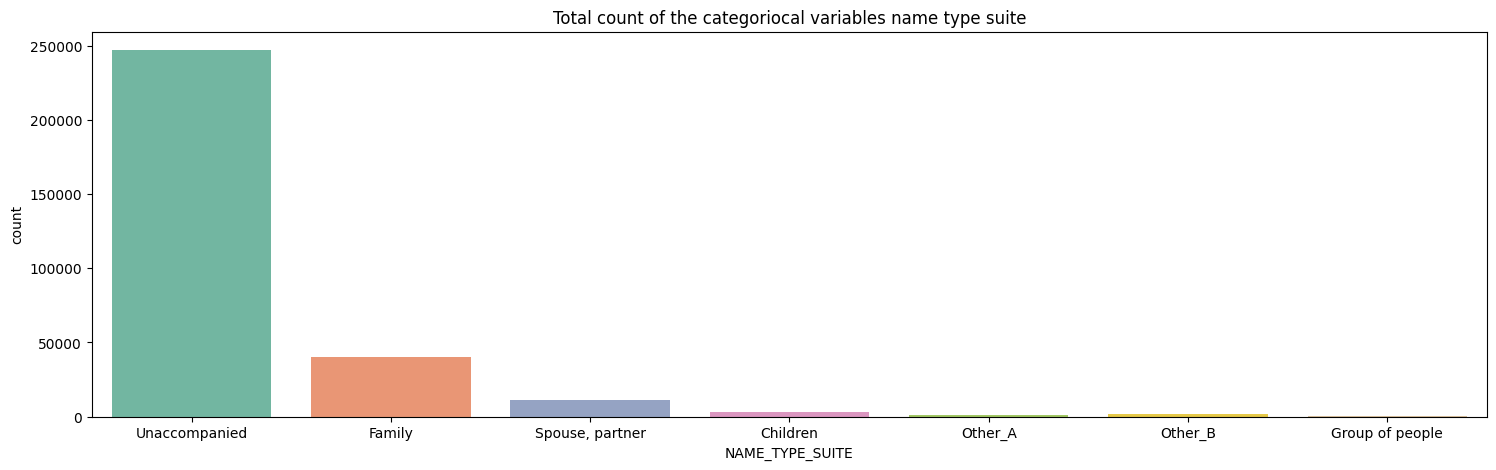

C:\Users\marut\AppData\Local\Temp\ipykernel_24376\3387204185.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col,palette="Set2")


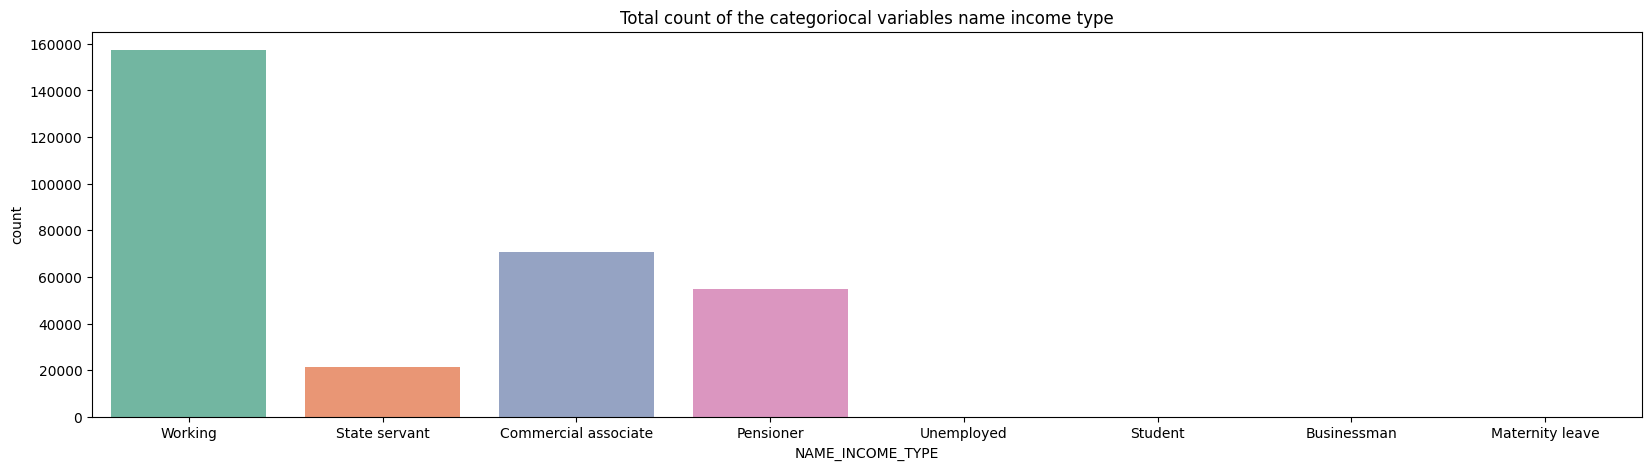

C:\Users\marut\AppData\Local\Temp\ipykernel_24376\3387204185.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col,palette="Set2")


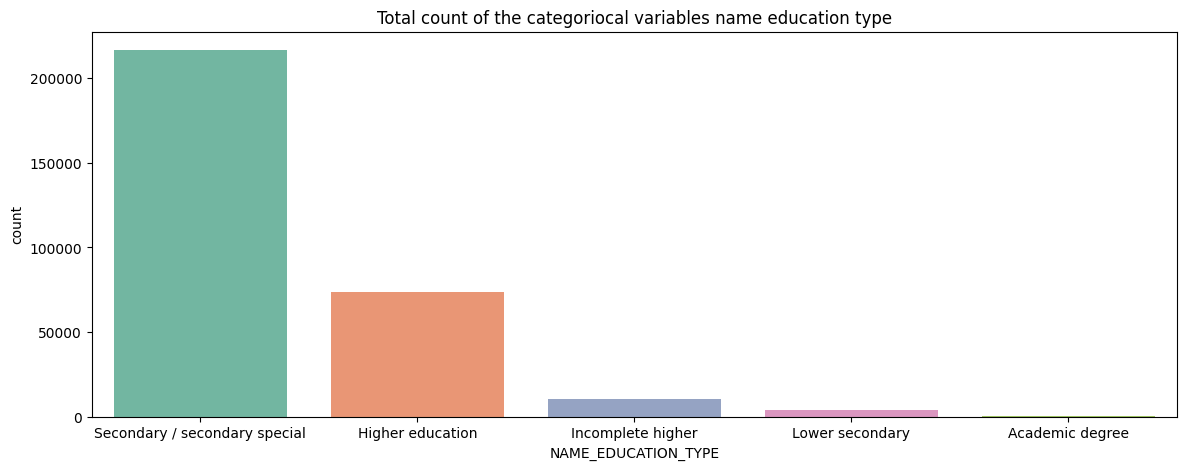

C:\Users\marut\AppData\Local\Temp\ipykernel_24376\3387204185.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col,palette="Set2")


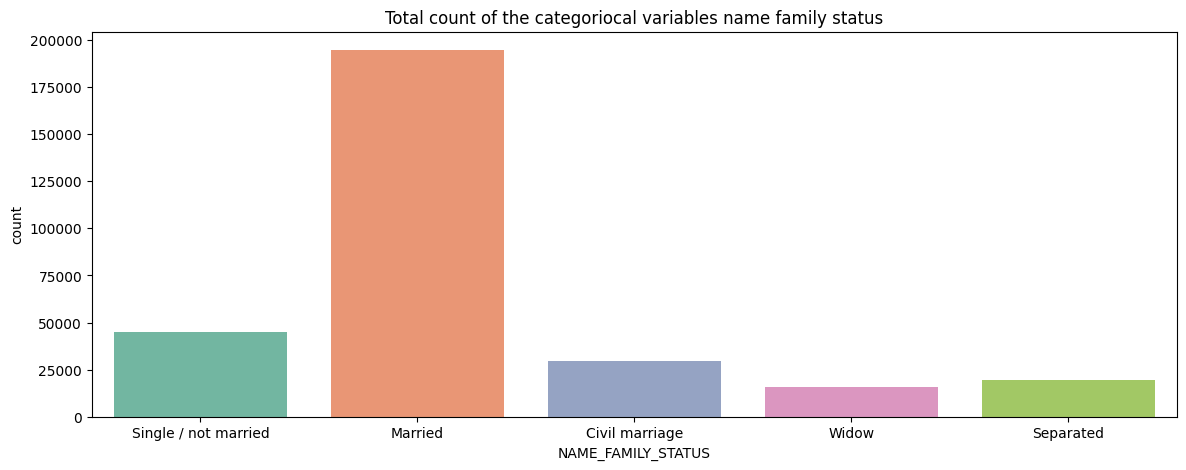

C:\Users\marut\AppData\Local\Temp\ipykernel_24376\3387204185.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col,palette="Set2")


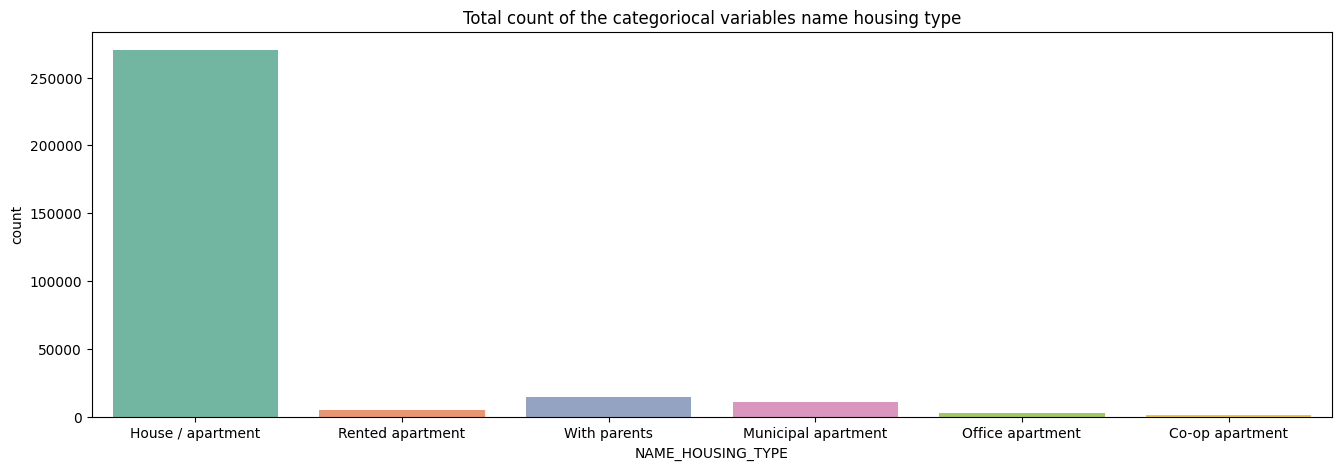

C:\Users\marut\AppData\Local\Temp\ipykernel_24376\3387204185.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col,palette="Set2")


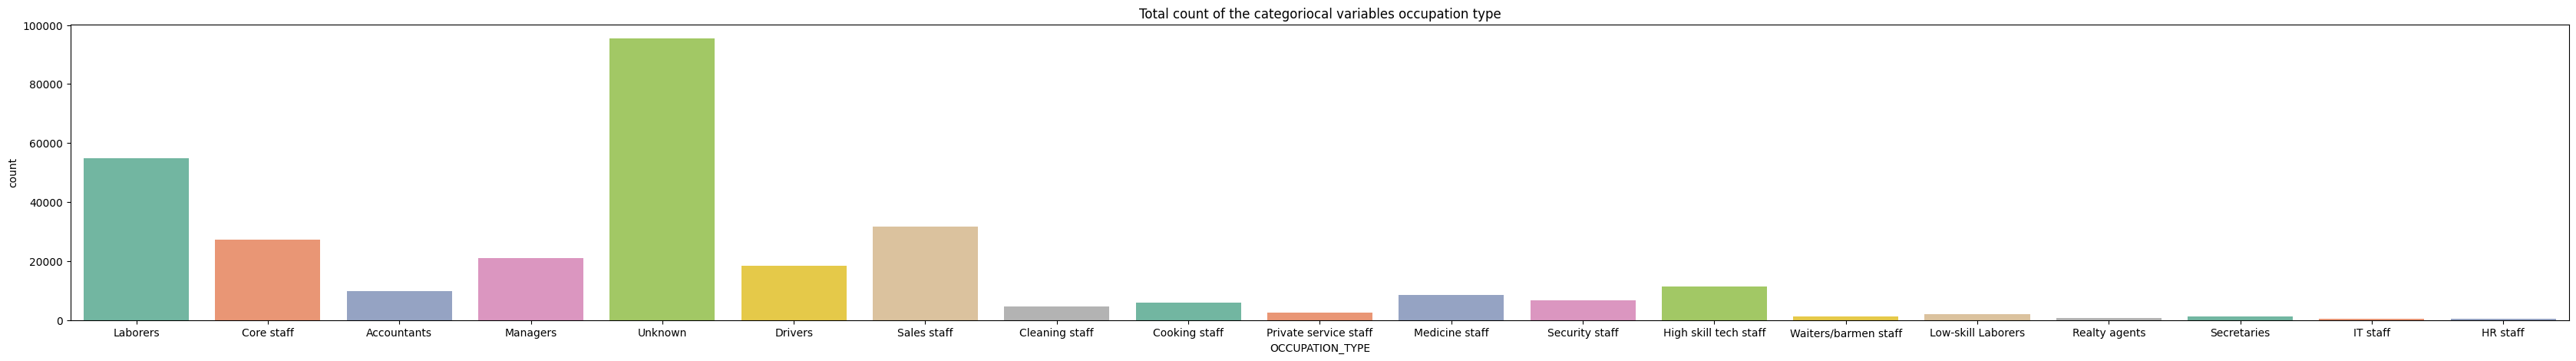

C:\Users\marut\AppData\Local\Temp\ipykernel_24376\3387204185.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col,palette="Set2")


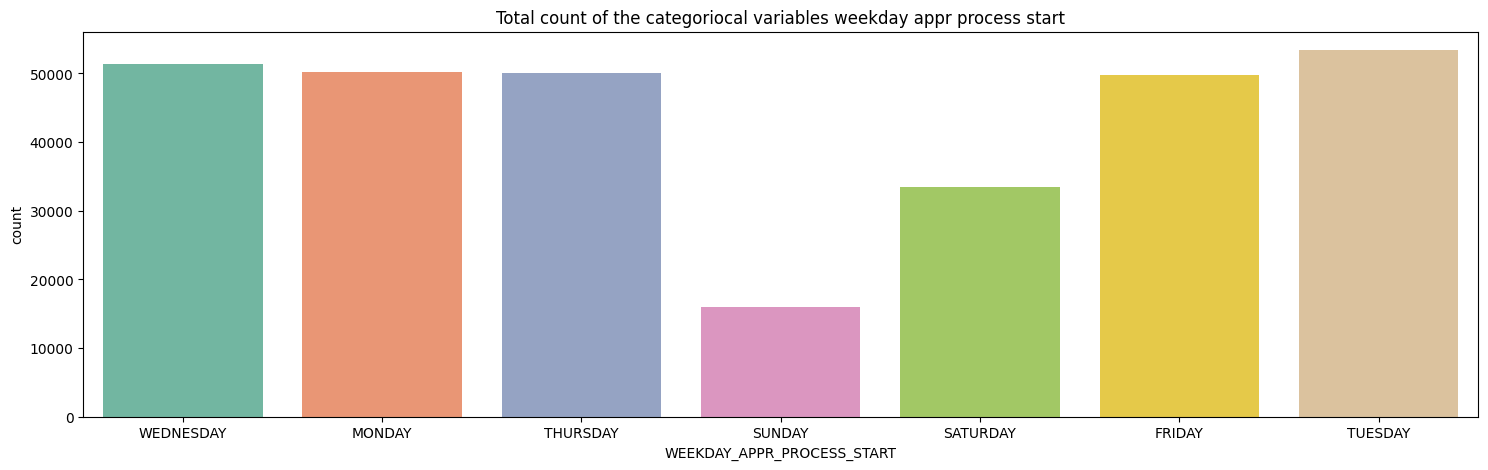

C:\Users\marut\AppData\Local\Temp\ipykernel_24376\3387204185.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col,palette="Set2")


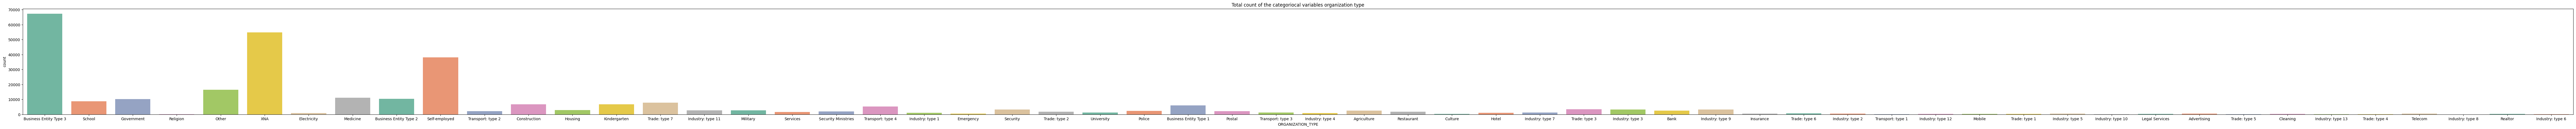

In [24]:
for col in categorical_columns:
    
    n_categories = len(data[col].value_counts())
    fig_width =  4 + (n_categories * 2) 
    fig_height = 5
    plt.figure(figsize=(fig_width, fig_height))  
    sns.countplot(data=data, x=col,palette="Set2")  
    plt.title('Total count of the categoriocal variables {}'.format(col.replace('_',' ').lower()))
    plt.show()

In [25]:
# Step 1: Replace Y/N/Yes/No values with 1/0
data.replace({'Y': 1, 'N': 0, 'Yes': 1, 'No': 0,'F':1,'M':0,'XNA':-1,'Cash loans':0,'Revolving loans':1},inplace=True)
data.head()

C:\Users\marut\AppData\Local\Temp\ipykernel_24376\4068266896.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'Y': 1, 'N': 0, 'Yes': 1, 'No': 0,'F':1,'M':0,'XNA':-1,'Cash loans':0,'Revolving loans':1},inplace=True)


SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1                   0            0             0   
1      100003       0                   0            1             0   
2      100004       0                   1            0             1   
3      100006       0                   0            1             0   
4      100007       0                   0            0             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1             0          202500.0    406597.5      24700.5   
1                0             0          270000.0   1293502.5      35698.5   
2                1             0           67500.0    135000.0       6750.0   
3                1             0          135000.0    312682.5      29686.5   
4                1             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120         -1.0           1               1                0   
1             -291         -1.0           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437         -1.0           1               1                0   
4            -3458         -1.0           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2

Trying to find out if there is any substantial differnce in income of people depending on the education and the profession so that we can have a better scoee of mapping the data

   AMT_INCOME_TOTAL            NAME_EDUCATION_TYPE  log_AMT_INCOME_TOTAL
0          202500.0  Secondary / secondary special             12.218500
1          270000.0               Higher education             12.506181
2           67500.0  Secondary / secondary special             11.119898
3          135000.0  Secondary / secondary special             11.813037
4          121500.0  Secondary / secondary special             11.707678


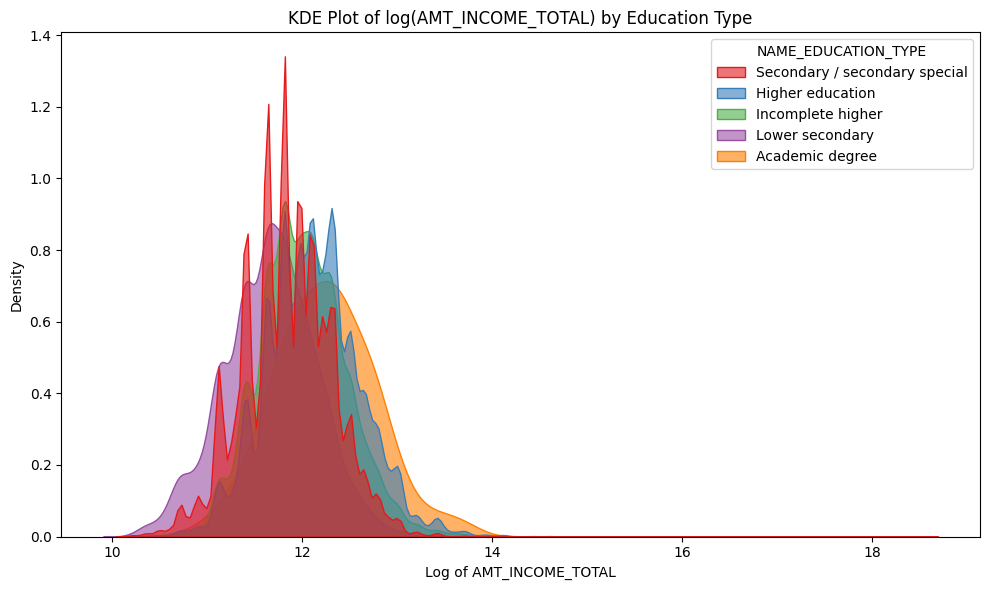

                               AMT_INCOME_TOTAL  log_AMT_INCOME_TOTAL
NAME_EDUCATION_TYPE                                                  
Lower secondary                   129825.945119             11.655330
Secondary / secondary special     155218.848227             11.839296
Incomplete higher                 181641.626536             12.000044
Higher education                  208159.622610             12.112774
Academic degree                   238306.748466             12.237378


In [26]:
long_data = data[['AMT_INCOME_TOTAL', 'NAME_EDUCATION_TYPE']].copy()

long_data['log_AMT_INCOME_TOTAL'] = np.log1p(long_data['AMT_INCOME_TOTAL'])
print(long_data.head())
# Plot KDE by education type
plt.figure(figsize=(10, 6))

sns.kdeplot(data=long_data, x='log_AMT_INCOME_TOTAL', hue='NAME_EDUCATION_TYPE', fill=True, common_norm=False, palette='Set1', alpha=0.6)

# Title and labels
plt.title('KDE Plot of log(AMT_INCOME_TOTAL) by Education Type')
plt.xlabel('Log of AMT_INCOME_TOTAL')
plt.ylabel('Density')

# Show the plot 
plt.tight_layout()
plt.show()
mean_income_by_education = long_data.groupby('NAME_EDUCATION_TYPE').agg({ 'AMT_INCOME_TOTAL': 'mean','log_AMT_INCOME_TOTAL': 'mean'}).sort_values(by='log_AMT_INCOME_TOTAL', ascending=True)
print(mean_income_by_education)

mean_income_by_education = {edu: rank for rank, edu in enumerate(mean_income_by_education.index, start=1)}


   AMT_INCOME_TOTAL NAME_INCOME_TYPE  log_AMT_INCOME_TOTAL
0          202500.0          Working             12.218500
1          270000.0    State servant             12.506181
2           67500.0          Working             11.119898
3          135000.0          Working             11.813037
4          121500.0          Working             11.707678


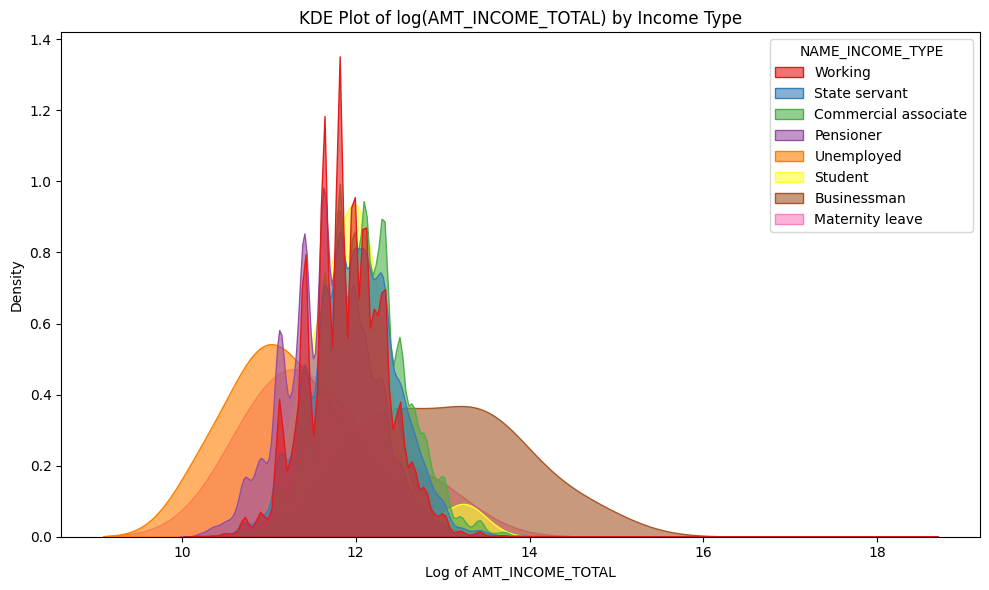

                      AMT_INCOME_TOTAL  log_AMT_INCOME_TOTAL
NAME_INCOME_TYPE                                            
Unemployed                90094.736842             11.195637
Maternity leave          140400.000000             11.588824
Pensioner                136207.739061             11.695122
Working                  163148.630608             11.890463
Student                  173911.764706             11.952065
State servant            179754.040187             11.978706
Commercial associate     202646.897801             12.094251
Businessman              652500.000000             13.053470


In [27]:
long_data = data[['AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE']].copy()

long_data['log_AMT_INCOME_TOTAL'] = np.log1p(long_data['AMT_INCOME_TOTAL'])
print(long_data.head())
# Plot KDE by education type
plt.figure(figsize=(10, 6))

sns.kdeplot(data=long_data, x='log_AMT_INCOME_TOTAL', hue='NAME_INCOME_TYPE', fill=True, common_norm=False, palette='Set1', alpha=0.6)

# Title and labels
plt.title('KDE Plot of log(AMT_INCOME_TOTAL) by Income Type')
plt.xlabel('Log of AMT_INCOME_TOTAL')
plt.ylabel('Density')

# Show the plot
plt.tight_layout()
plt.show()
mean_income_by_income_type = long_data.groupby('NAME_INCOME_TYPE').agg({ 'AMT_INCOME_TOTAL': 'mean','log_AMT_INCOME_TOTAL': 'mean'}).sort_values(by='log_AMT_INCOME_TOTAL', ascending=True)

print(mean_income_by_income_type)
education_income_rank = {edu: rank for rank, edu in enumerate(mean_income_by_income_type.index, start=1)}

   AMT_INCOME_TOTAL OCCUPATION_TYPE  log_AMT_INCOME_TOTAL
0          202500.0        Laborers             12.218500
1          270000.0      Core staff             12.506181
2           67500.0        Laborers             11.119898
3          135000.0        Laborers             11.813037
4          121500.0      Core staff             11.707678


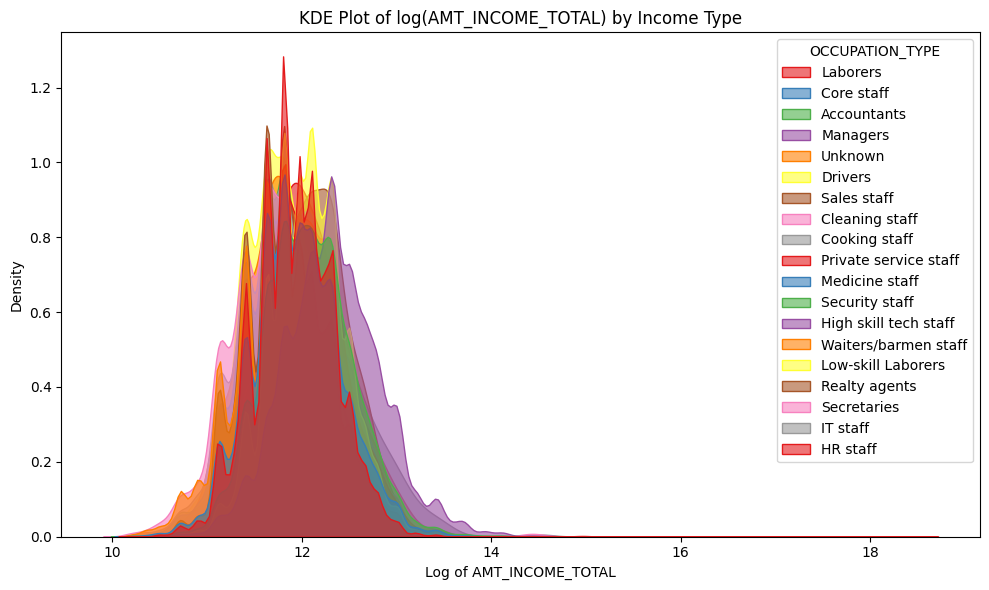

                       AMT_INCOME_TOTAL  log_AMT_INCOME_TOTAL
OCCUPATION_TYPE                                              
Cleaning staff            130908.447887             11.679058
Low-skill Laborers        133325.547183             11.723868
Cooking staff             138541.659056             11.744738
Waiters/barmen staff      144253.328090             11.783921
Unknown                   153319.674220             11.806895
Medicine staff            149743.260787             11.813149
Security staff            149717.437303             11.820114
Sales staff               152263.371530             11.832806
Secretaries               160221.863109             11.855766
Laborers                  166360.802332             11.919306
Core staff                172677.373389             11.942628
High skill tech staff     182848.342454             12.006895
Private service staff     182180.647965             12.010844
HR staff                  188471.983871             12.046010
Drivers 

In [28]:
long_data = data[['AMT_INCOME_TOTAL', 'OCCUPATION_TYPE']].copy()

long_data['log_AMT_INCOME_TOTAL'] = np.log1p(long_data['AMT_INCOME_TOTAL'])
print(long_data.head())
# Plot KDE by education type
plt.figure(figsize=(10, 6))

sns.kdeplot(data=long_data, x='log_AMT_INCOME_TOTAL', hue='OCCUPATION_TYPE', fill=True, common_norm=False, palette='Set1', alpha=0.6)

# Title and labels
plt.title('KDE Plot of log(AMT_INCOME_TOTAL) by Income Type')
plt.xlabel('Log of AMT_INCOME_TOTAL')
plt.ylabel('Density')

# Show the plot
plt.tight_layout()
plt.show()

mean_income_by_occupation_type = long_data.groupby('OCCUPATION_TYPE').agg({ 'AMT_INCOME_TOTAL': 'mean','log_AMT_INCOME_TOTAL': 'mean'}).sort_values(by='log_AMT_INCOME_TOTAL', ascending=True)

print(mean_income_by_occupation_type)
education_occupation_type_rank = {edu: rank for rank, edu in enumerate(mean_income_by_occupation_type.index, start=1)}

In [29]:
data['NAME_EDUCATION_TYPE']=data['NAME_EDUCATION_TYPE'].map(mean_income_by_education)
data['NAME_INCOME_TYPE']=data['NAME_INCOME_TYPE'].map(mean_income_by_education)
data['OCCUPATION_TYPE']=data['OCCUPATION_TYPE'].map(education_occupation_type_rank)
data.head()

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1                   0            0             0   
1      100003       0                   0            1             0   
2      100004       0                   1            0             1   
3      100006       0                   0            1             0   
4      100007       0                   0            0             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1             0          202500.0    406597.5      24700.5   
1                0             0          270000.0   1293502.5      35698.5   
2                1             0           67500.0    135000.0       6750.0   
3                1             0          135000.0    312682.5      29686.5   
4                1             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  \
0         351000.0   Unaccompanied               NaN                    2   
1        1129500.0          Family               NaN                    4   
2         135000.0   Unaccompanied               NaN                    2   
3         297000.0   Unaccompanied               NaN                    2   
4         513000.0   Unaccompanied               NaN                    2   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4  Single / not married  House / apartment                    0.028663   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0       -9461           -637            -3648.0            -2120         -1.0   
1      -16765          -1188            -1186.0             -291         -1.0   
2      -19046           -225            -4260.0            -2531         26.0   
3      -19005          -3039            -9833.0            -2437         -1.0   
4      -19932          -3038            -4311.0            -3458         -1.0   

   FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0           1               1                0                 1           1   
1           1               1                0                 1           1   
2           1               1                1                 1           1   
3           1               1                0                 1           0   
4           1               1                0                 1           0   

   FLAG_EMAIL  OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0           0               10              1.0                     2   
1           0               11              2.0                     1   
2           0               10              1.0                     2   
3           0               10              2.0                     2   
4           0               11              1.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   
1                            1                     MONDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                   THURSDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0 

In [30]:
categorical_columns=data.select_dtypes(include=['object','category']).columns
print(categorical_columns.tolist())

['NAME_TYPE_SUITE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']


In [31]:
weekdays = ['MONDAY', 'TUESDAY', 'WEDNESDAY', 'THURSDAY', 'FRIDAY']
data['IS_WEEKDAY'] = data['WEEKDAY_APPR_PROCESS_START'].isin(weekdays).astype(int)
if 'WEEKDAY_APPR_PROCESS_START' in data.columns:
    data.drop('WEEKDAY_APPR_PROCESS_START', axis=1, inplace=True)
data.head()

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1                   0            0             0   
1      100003       0                   0            1             0   
2      100004       0                   1            0             1   
3      100006       0                   0            1             0   
4      100007       0                   0            0             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1             0          202500.0    406597.5      24700.5   
1                0             0          270000.0   1293502.5      35698.5   
2                1             0           67500.0    135000.0       6750.0   
3                1             0          135000.0    312682.5      29686.5   
4                1             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  \
0         351000.0   Unaccompanied               NaN                    2   
1        1129500.0          Family               NaN                    4   
2         135000.0   Unaccompanied               NaN                    2   
3         297000.0   Unaccompanied               NaN                    2   
4         513000.0   Unaccompanied               NaN                    2   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4  Single / not married  House / apartment                    0.028663   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0       -9461           -637            -3648.0            -2120         -1.0   
1      -16765          -1188            -1186.0             -291         -1.0   
2      -19046           -225            -4260.0            -2531         26.0   
3      -19005          -3039            -9833.0            -2437         -1.0   
4      -19932          -3038            -4311.0            -3458         -1.0   

   FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0           1               1                0                 1           1   
1           1               1                0                 1           1   
2           1               1                1                 1           1   
3           1               1                0                 1           0   
4           1               1                0                 1           0   

   FLAG_EMAIL  OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0           0               10              1.0                     2   
1           0               11              2.0                     1   
2           0               10              1.0                     2   
3           0               10              2.0                     2   
4           0               11              1.0                     2   

   REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
0                            2                       10   
1                            1                       11   
2                            2                        9   
3                            2                       17   
4                            2                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \


In [32]:
categorical_columns=data.select_dtypes(include=['object','category']).columns
categorical_columns= categorical_columns.tolist()
data_dummies = pd.get_dummies(data[categorical_columns], drop_first=True)
data = pd.concat([data, data_dummies], axis=1)
data.head()

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1                   0            0             0   
1      100003       0                   0            1             0   
2      100004       0                   1            0             1   
3      100006       0                   0            1             0   
4      100007       0                   0            0             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1             0          202500.0    406597.5      24700.5   
1                0             0          270000.0   1293502.5      35698.5   
2                1             0           67500.0    135000.0       6750.0   
3                1             0          135000.0    312682.5      29686.5   
4                1             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  \
0         351000.0   Unaccompanied               NaN                    2   
1        1129500.0          Family               NaN                    4   
2         135000.0   Unaccompanied               NaN                    2   
3         297000.0   Unaccompanied               NaN                    2   
4         513000.0   Unaccompanied               NaN                    2   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4  Single / not married  House / apartment                    0.028663   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0       -9461           -637            -3648.0            -2120         -1.0   
1      -16765          -1188            -1186.0             -291         -1.0   
2      -19046           -225            -4260.0            -2531         26.0   
3      -19005          -3039            -9833.0            -2437         -1.0   
4      -19932          -3038            -4311.0            -3458         -1.0   

   FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0           1               1                0                 1           1   
1           1               1                0                 1           1   
2           1               1                1                 1           1   
3           1               1                0                 1           0   
4           1               1                0                 1           0   

   FLAG_EMAIL  OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0           0               10              1.0                     2   
1           0               11              2.0                     1   
2           0               10              1.0                     2   
3           0               10              2.0                     2   
4           0               11              1.0                     2   

   REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
0                            2                       10   
1                            1                       11   
2                            2                        9   
3                            2                       17   
4                            2                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \


In [33]:
corr_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(10, 10),dpi=1200)
sns.heatmap(corr_matrix, cbar=True, square=True, cmap='viridis', annot=False, fmt=".2f")
plt.title("Heatmap for the Correlation Matrix")
plt.show()

In [34]:
target_correlation=corr_matrix['TARGET']
print(target_correlation.sort_values(ascending=False))

TARGET                                      1.000000
DAYS_BIRTH                                  0.078636
REGION_RATING_CLIENT_W_CITY                 0.060900
REGION_RATING_CLIENT                        0.058904
DAYS_LAST_PHONE_CHANGE                      0.055887
DAYS_ID_PUBLISH                             0.051397
REG_CITY_NOT_WORK_CITY                      0.051146
FLAG_EMP_PHONE                              0.046223
REG_CITY_NOT_LIVE_CITY                      0.044723
FLAG_DOCUMENT_3                             0.043944
DAYS_REGISTRATION                           0.042265
LIVE_CITY_NOT_WORK_CITY                     0.032542
DEF_30_CNT_SOCIAL_CIRCLE                    0.032068
DEF_60_CNT_SOCIAL_CIRCLE                    0.031140
NAME_HOUSING_TYPE_With parents              0.030266
ORGANIZATION_TYPE_Self-employed             0.029124
FLAG_WORK_PHONE                             0.028366
NAME_FAMILY_STATUS_Single / not married     0.027063
ORGANIZATION_TYPE_Business Entity Type 3    0.

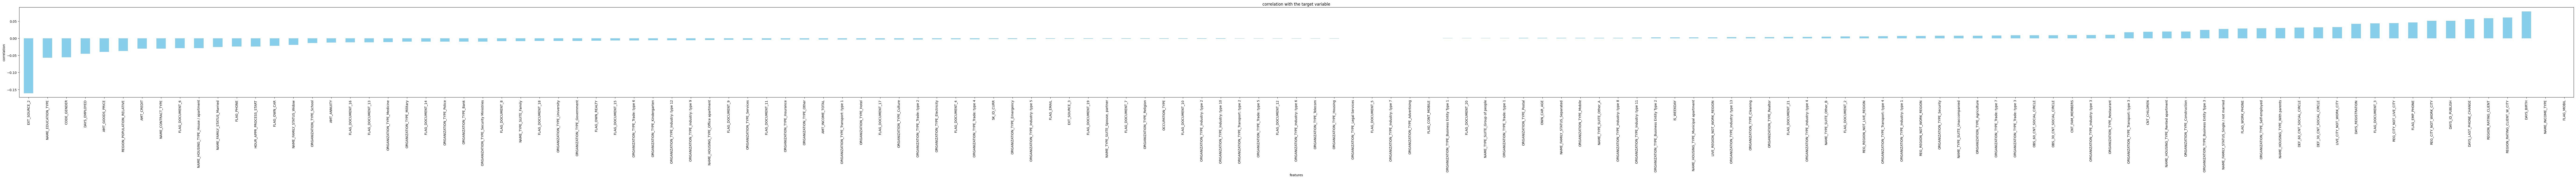

In [35]:
height=5
width=5+target_correlation.size
plt.figure(figsize=(width,height))
target_correlation.drop('TARGET').sort_values().plot(kind='bar',color='skyblue')
plt.title("correlation with the target variable")
plt.xlabel('features')
plt.ylabel('correlation')
plt.show()

In [36]:
features_model_training=target_correlation.drop(['TARGET']).abs().sort_values(ascending=False).head(30).index.tolist()
data_top_30_features=data[features_model_training]
y=data['TARGET']
x=data_top_30_features
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [37]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [38]:
models={
    'logistic_regression': LogisticRegression(),
    'decision_tree': DecisionTreeClassifier(),
    'random_forest': RandomForestClassifier(n_estimators=100),
}

In [39]:
for name, model in models.items():
    if name in ['logistic_regression']:
        model.fit(X_train_scaled,y_train)
        print(f'{name} model training completed')
    else:
        model.fit(x_train, y_train)
        print(f'{name} model training completed')

logistic_regression model training completed
decision_tree model training completed
random_forest model training completed


In [42]:
for name, model in models.items():
    if name in ['logistic_regression']:
        y_pred = model.predict(X_test_scaled)
    else:
        y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")

logistic_regression Accuracy: 0.9190
decision_tree Accuracy: 0.8471
random_forest Accuracy: 0.9191


In [45]:
# Feature importance - Logistic Regression
log_reg_importance = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': np.abs(models['logistic_regression'].coef_[0])
}).sort_values(by='Importance', ascending=False)

# Feature importance - Decision Tree
dt_importance = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': models['decision_tree'].feature_importances_
}).sort_values(by='Importance', ascending=False)

# Feature importance - Random Forest
rf_importance = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': models['random_forest'].feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display results
print("\nLogistic Regression Feature Importance:")
print(log_reg_importance)

print("\nDecision Tree Feature Importance:")
print(dt_importance)

print("\nRandom Forest Feature Importance:")
print(rf_importance)


Logistic Regression Feature Importance:
                                     Feature  Importance
14                           AMT_GOODS_PRICE    1.113179
19                                AMT_CREDIT    1.056224
0                               EXT_SOURCE_2    0.428846
4                        NAME_EDUCATION_TYPE    0.169381
6                                CODE_GENDER    0.165597
9                             FLAG_EMP_PHONE    0.141066
1                                 DAYS_BIRTH    0.139149
10                             DAYS_EMPLOYED    0.120488
12                           FLAG_DOCUMENT_3    0.117108
2                REGION_RATING_CLIENT_W_CITY    0.113142
7                            DAYS_ID_PUBLISH    0.097413
25                           FLAG_WORK_PHONE    0.080887
5                     DAYS_LAST_PHONE_CHANGE    0.077161
27                NAME_FAMILY_STATUS_Married    0.066088
22           ORGANIZATION_TYPE_Self-employed    0.062840
28  ORGANIZATION_TYPE_Business Entity Type 3   

C:\Users\marut\AppData\Local\Temp\ipykernel_24376\3532020913.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=log_reg_importance, palette='viridis')


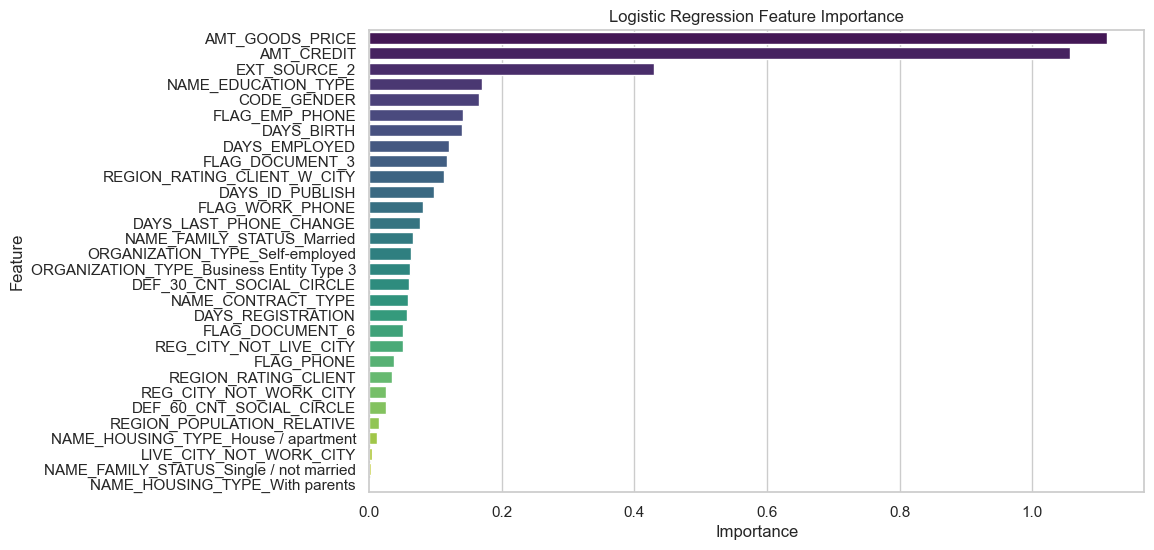

C:\Users\marut\AppData\Local\Temp\ipykernel_24376\3532020913.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=dt_importance, palette='viridis')


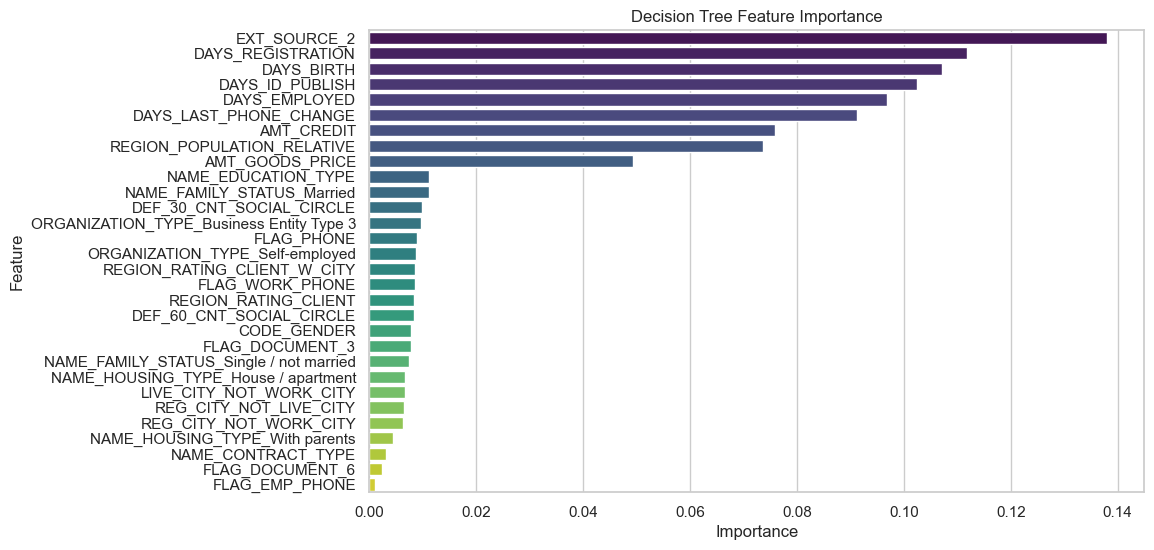

C:\Users\marut\AppData\Local\Temp\ipykernel_24376\3532020913.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=rf_importance, palette='viridis')


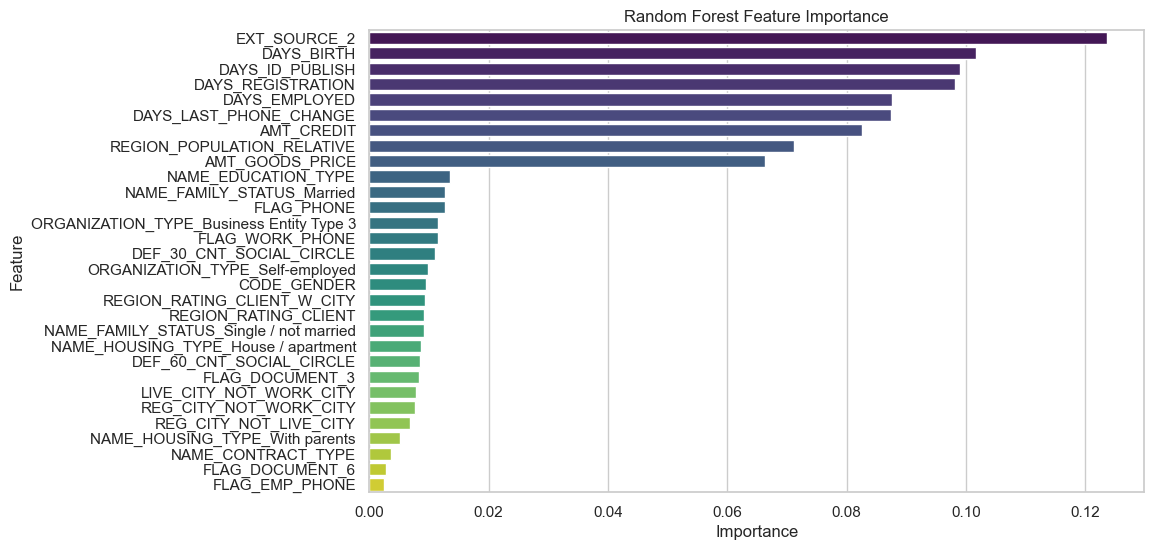

In [47]:

sns.set(style="whitegrid")

# 1. Logistic Regression Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=log_reg_importance, palette='viridis')
plt.title('Logistic Regression Feature Importance')
plt.show()

# 2. Decision Tree Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=dt_importance, palette='viridis')
plt.title('Decision Tree Feature Importance')
plt.show()

# 3. Random Forest Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rf_importance, palette='viridis')
plt.title('Random Forest Feature Importance')
plt.show()
